In [1]:
# Keilands sandbox
import sys
sys.path.append('D:\Documents\Analysis\LogisticRegression\neuro_replay-master')

In [2]:
from scipy.io import loadmat

In [3]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
from sklearn.preprocessing import StandardScaler

In [4]:
from data import *
from theta import *
from decoding import *
from plot import *

In [5]:
theta_thres = 20
corr_thres = 0.9
rat_name = 'Superchris'

dataPaths = {}
dataPaths['trial'] = 'D:\Documents\Data\processedHPC\{}\{}_trial_info.npy'
dataPaths['spike'] = 'D:\Documents\Data\processedHPC\{}\{}_spike_data_binned.npy'
dataPaths['lfp'] = 'D:\Documents\Data\processedHPC\{}\{}_lfp_data_sampled.npy'

trial_info, spike_data, lfp_data = load_data(dataPaths, rat_name)
target, spike_data, lfp_data = clean_data(trial_info, spike_data, lfp_data)
tetrode_index = reference_tetrode(rat_name)
lfp_reference = lfp_data[:, tetrode_index, :]  # get reference LFP

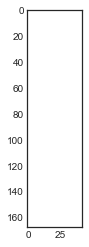

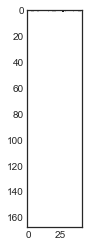

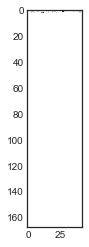

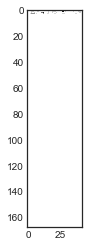

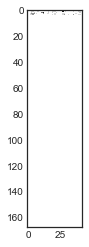

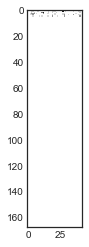

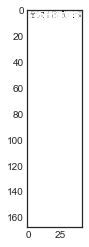

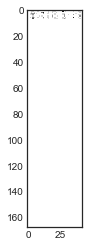

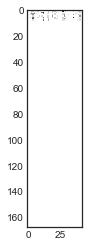

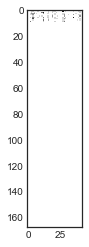

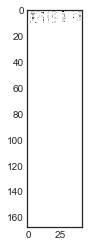

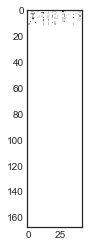

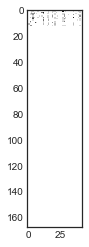

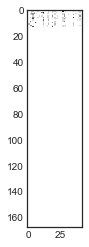

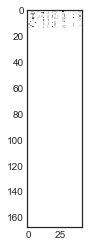

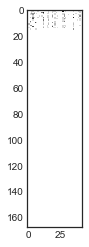

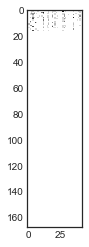

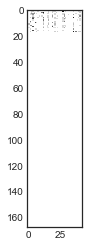

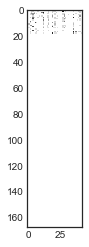

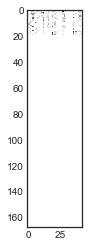

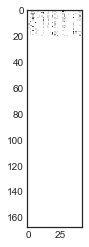

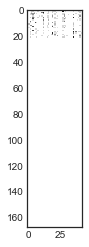

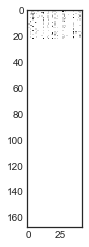

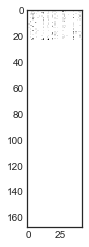

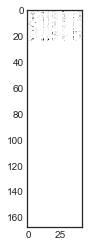

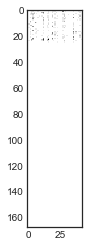

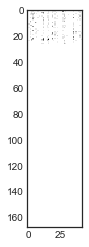

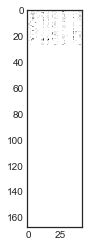

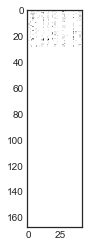

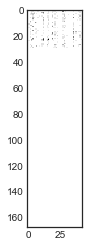

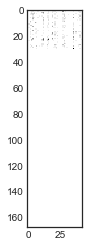

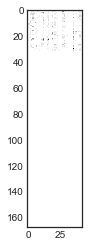

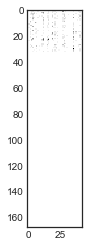

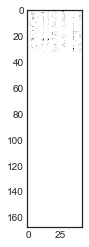

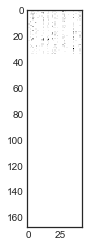

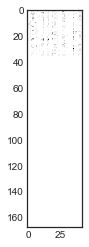

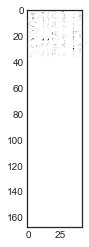

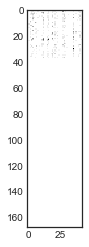

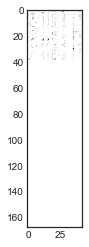

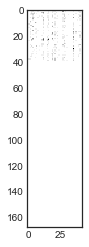

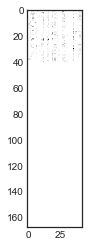

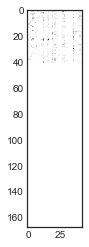

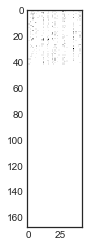

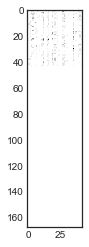

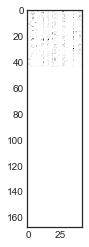

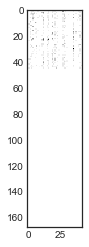

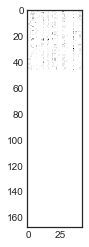

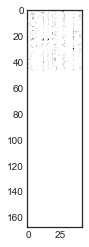

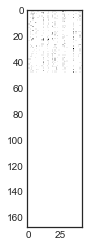

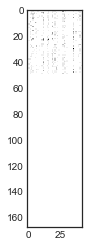

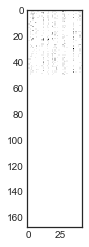

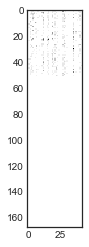

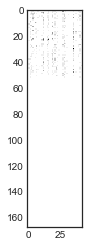

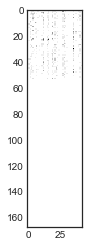

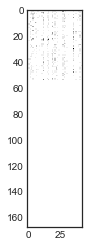

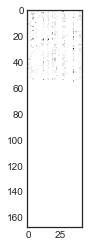

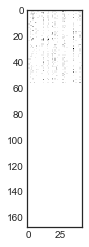

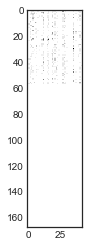

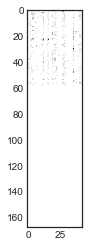

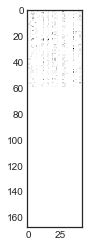

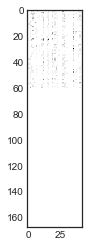

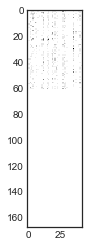

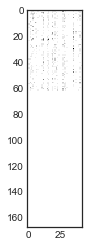

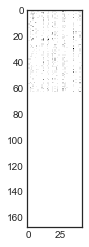

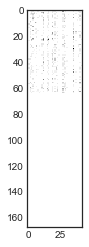

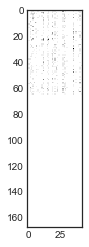

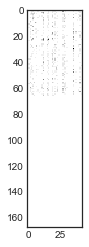

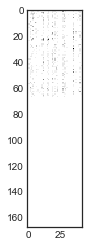

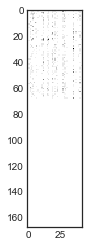

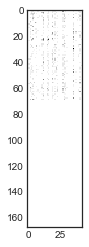

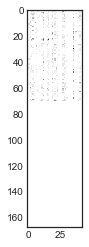

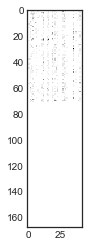

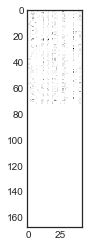

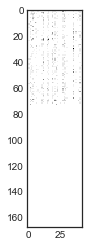

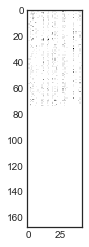

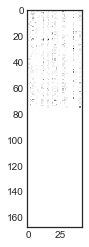

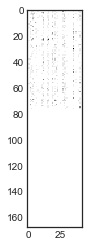

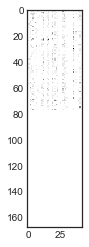

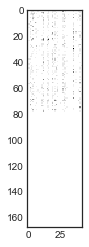

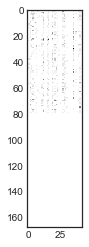

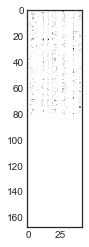

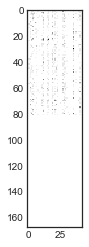

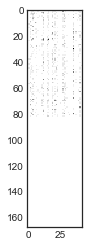

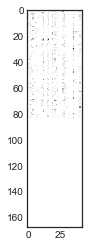

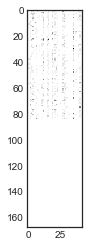

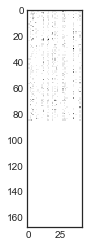

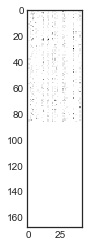

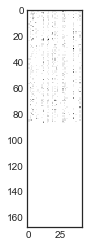

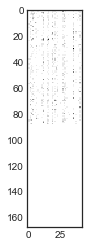

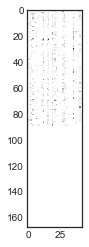

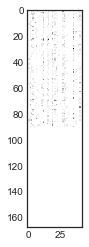

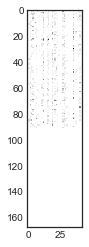

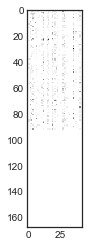

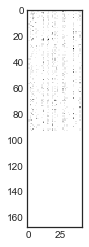

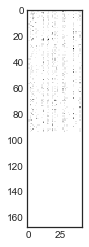

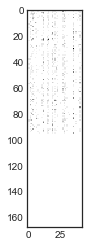

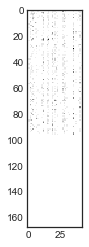

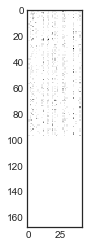

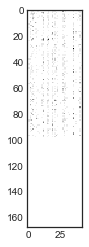

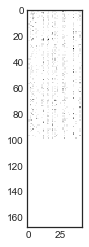

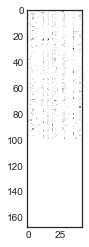

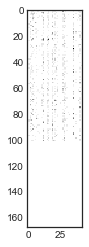

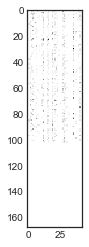

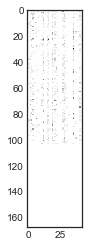

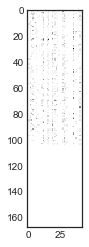

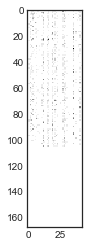

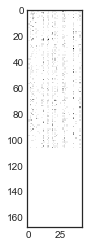

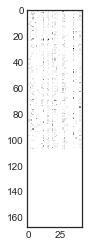

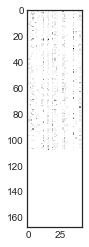

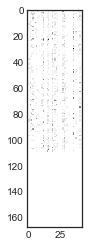

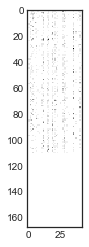

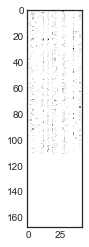

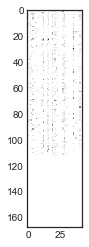

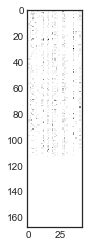

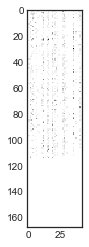

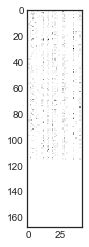

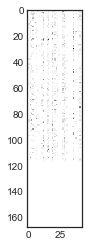

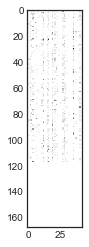

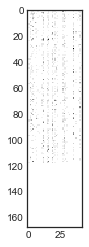

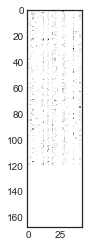

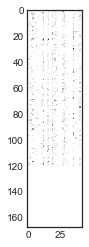

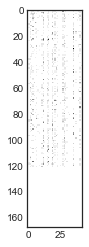

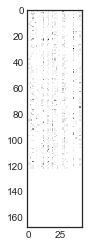

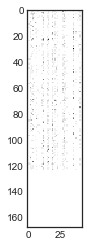

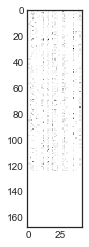

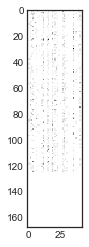

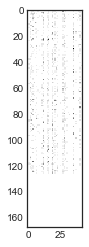

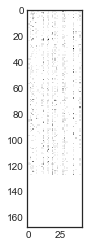

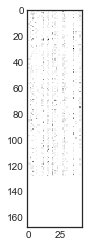

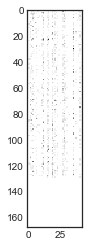

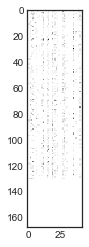

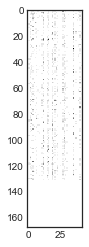

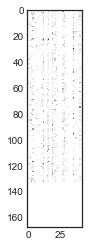

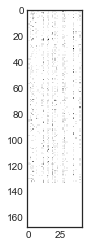

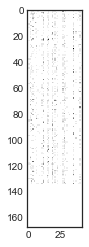

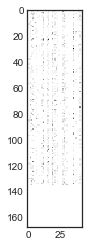

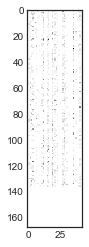

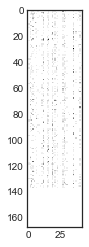

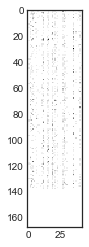

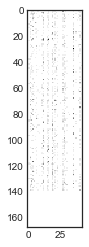

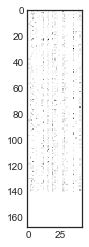

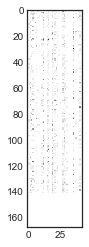

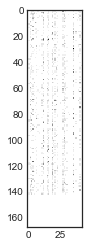

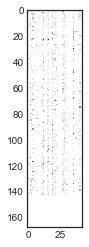

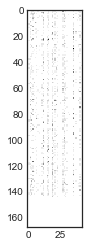

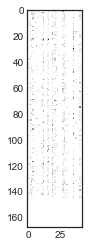

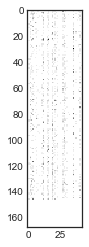

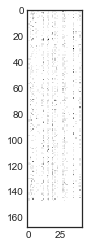

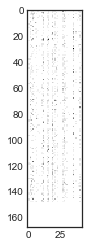

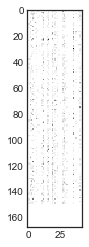

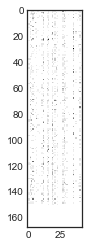

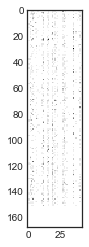

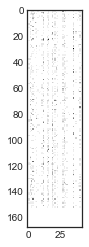

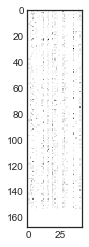

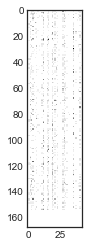

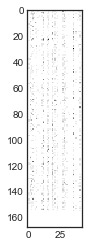

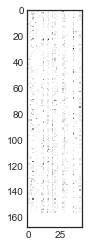

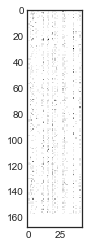

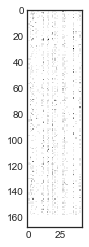

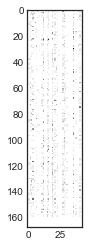

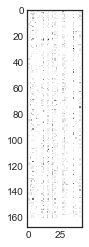

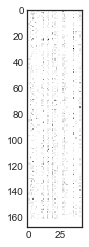

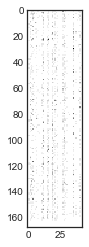

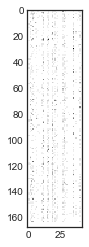

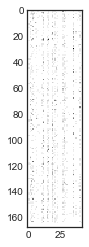

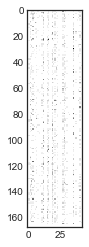

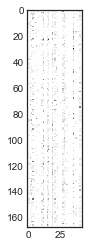

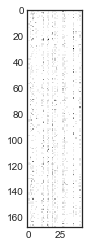

In [6]:
training_features = process_spike(spike_data, lfp_reference)

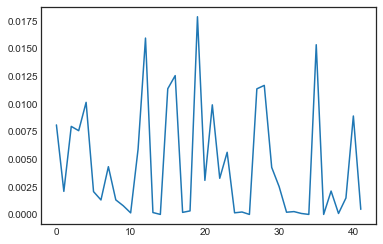

In [15]:

scaler = StandardScaler()
training = scaler.fit_transform(training_features)

#plt.plot(np.mean(training_features, axis=0))

## Grab the data

In [38]:

dataPaths = {}
dataPaths['trial'] = 'D:\Documents\Data\processedHPC\{}\{}_trial_info.npy'
dataPaths['spike'] = 'D:\Documents\Data\processedHPC\{}\{}_spike_data_binned.npy'
dataPaths['lfp'] = 'D:\Documents\Data\processedHPC\{}\{}_lfp_data_sampled.npy'


In [39]:
rat_name = 'Superchris'
inseq, corr = 1, 0
trial_info, spike_data, lfp_data = load_data(dataPaths, rat_name)
target, spike_data, lfp_data = clean_data2(trial_info, spike_data, lfp_data, inseq, corr)


In [40]:
# inseq/corr (168, 42, 400)
# inseq/incorr (16, 41, 400)
# outseq/corr (21, 40, 400)
spike_data.shape


(16, 41, 400)

In [41]:
# inseq/corr (168, 21, 400)
# inseq/incorr  (16, 21, 400)
# outseq/corr (21, 21, 400)
lfp_data.shape

(16, 21, 400)

In [42]:
# Grab all of the data and store it in a dict
inseq, corr = 1, 0
ratNames = ['Barat', 'Buchanan', 'Stella', 'Superchris', 'Mitt']
spikeDict, lfpDict = {}, {}
for rat_name in ratNames:
    trial_info, spike_data, lfp_data = load_data(dataPaths, rat_name)
    target, spike_data, lfp_data = clean_data2(trial_info, spike_data, lfp_data, inseq, corr)
    spikeDict[rat_name] = spike_data
    lfpDict[rat_name] = lfp_data


In [43]:
for rat_name in spikeDict.keys():
    print(rat_name)
    
# trial_info[:, 1] = in vs outseq
# trial_info[:, 0] = correct or incorrect

Barat
Buchanan
Stella
Superchris
Mitt


### Let's look at the spikes

In [44]:
# function to plot the spikes

def rasterMat():
    plt.scatter(np.arange(400) - 200, np.ones(400) * i, s=spike_data[trial_index, i, :] * 50, color='black', marker="|",alpha=0.7)

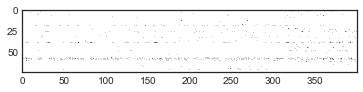

(75, 400)
(400,)


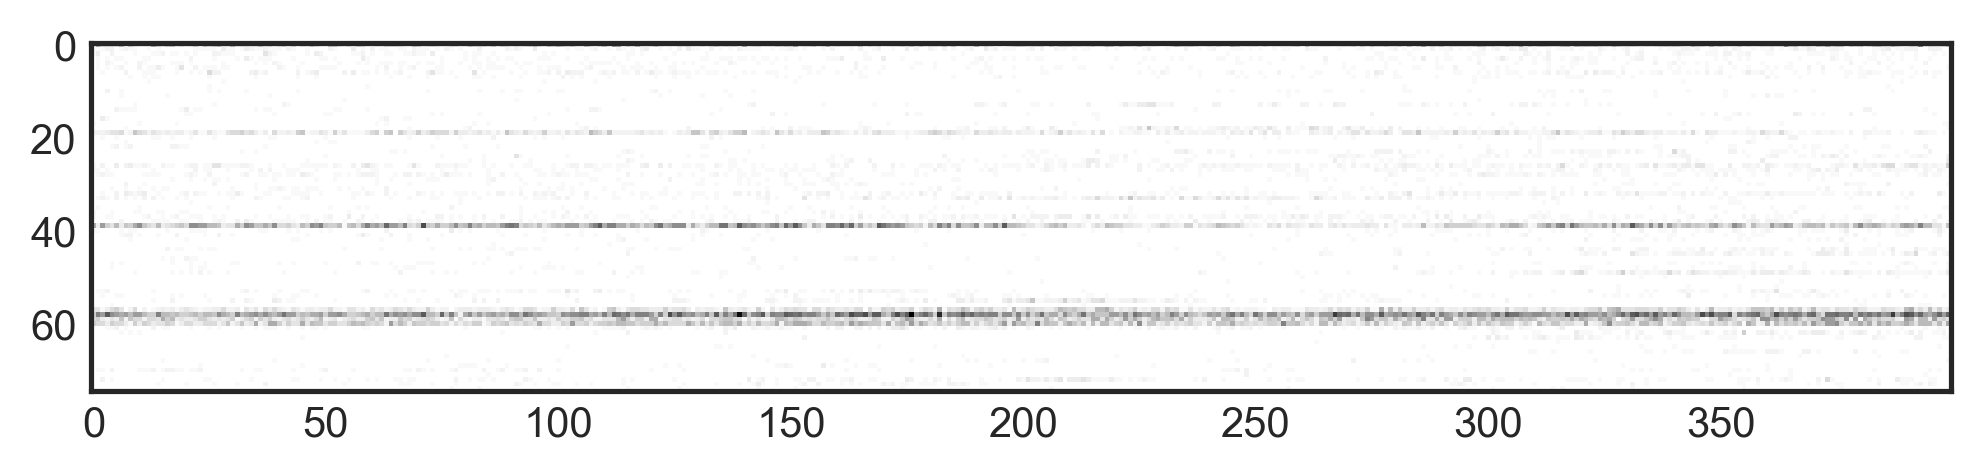

In [45]:
# spike_data.shape:
# trials, cells, time
tm = spike_data[1,:,:]

plt.imshow(tm)
plt.show()

# compute the mean spike over trials
avgSpk = np.mean(spike_data, axis=0)
print(avgSpk.shape)

# Find the mean of all neurons per time for the trial
ensembleFire = np.mean(avgSpk, axis=0)
print(ensembleFire.shape)

fig = plt.figure(figsize=(8, 4), dpi=300)
plt.imshow(avgSpk)
plt.show()

Text(0.5, 1.0, 'Mitt All trial average Raster')

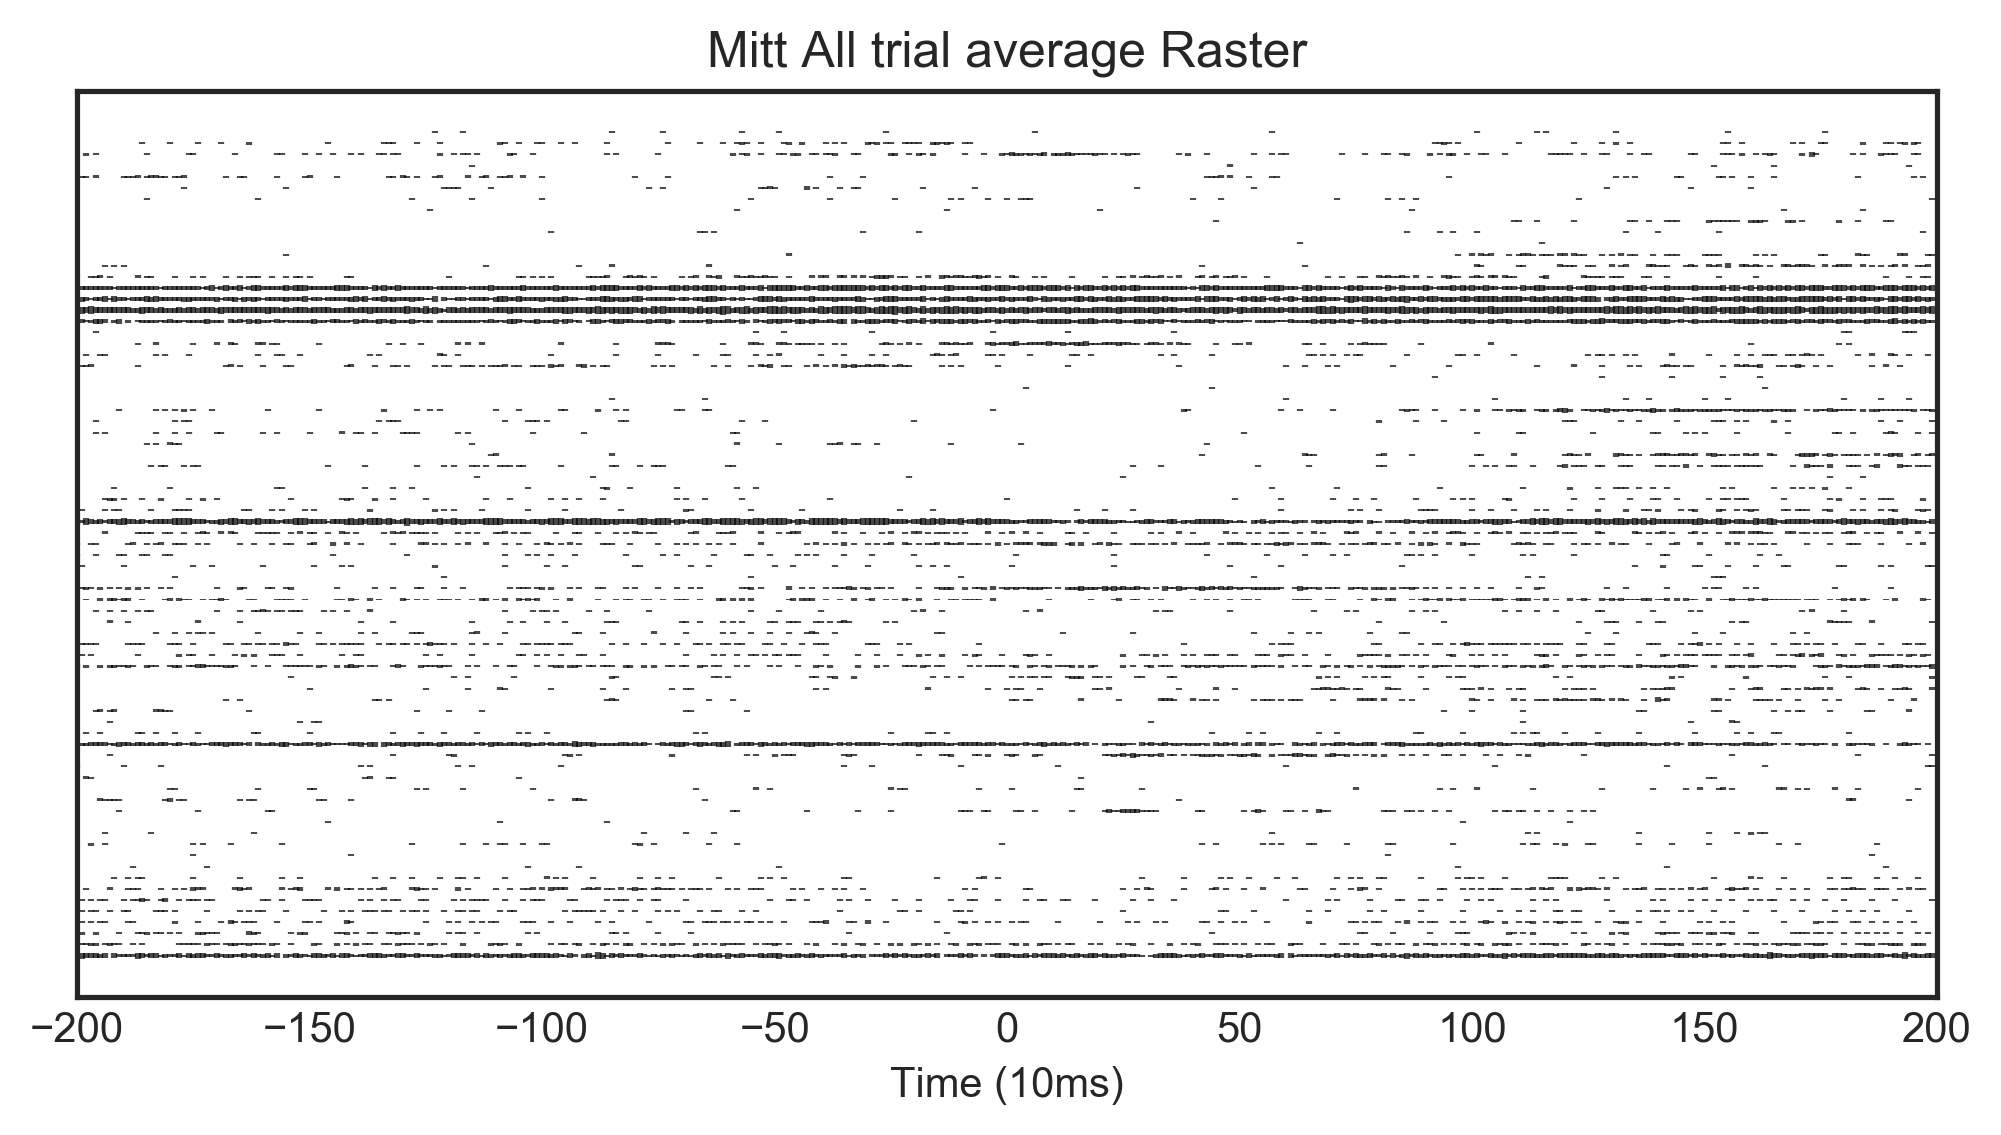

In [29]:
# plot the averaged binned spiking activity
spikeMat = avgSpk
tAx = np.arange(spikeMat.shape[1]) - spikeMat.shape[1] / 2
fig = plt.figure(figsize=(8, 4), dpi=300)
for i in range(spikeMat.shape[0]):
    plt.scatter(tAx, np.ones(400) * i, s=spikeMat[i, :]*50, color='black', marker="|",alpha=0.7)
plt.xlim(-200, 200)
#plt.ylim(0.5, 46.5)
plt.xlabel('Time (10ms)')
plt.yticks([], [])
plt.title('%s All trial average Raster'%(rat_name))

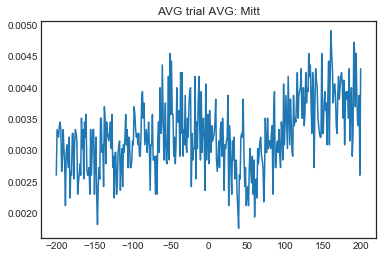

In [30]:
plt.plot(tAx, ensembleFire)
plt.title('AVG trial AVG: %s'%(rat_name))
plt.savefig('figs\\'+rat_name+'_seq-'+str(inseq)+'_corr-'+str(corr)+'_avgTrialAvgFire.png')
plt.show()


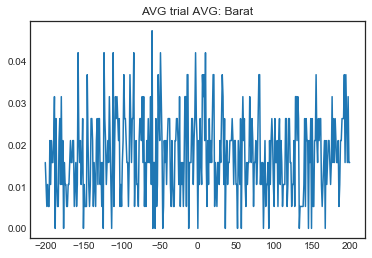

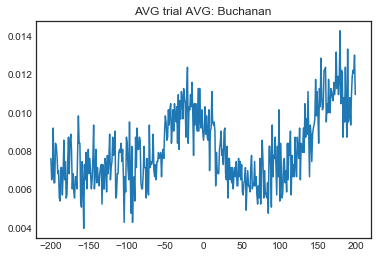

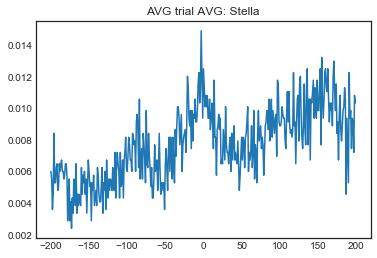

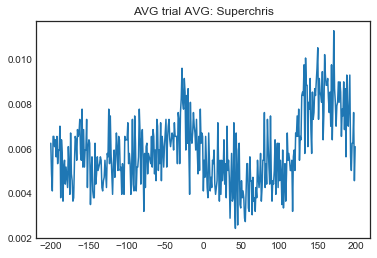

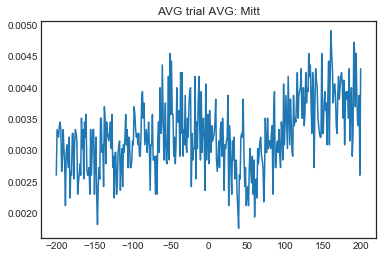

In [31]:
# Let's do it for all the boi's

ensList = []
for rat_name in spikeDict.keys():
    spike_data = spikeDict[rat_name] # Grab the spikes
    
    avgSpk = np.mean(spike_data, axis=0)  # compute the mean spike over trials
    ensembleFire = np.mean(avgSpk, axis=0) # Find the mean of all neurons per time for the trial
    ensList.append(ensembleFire)
    
    # Plot the avg trial avg fire
    plt.plot(tAx, ensembleFire)
    plt.title('AVG trial AVG: %s'%(rat_name))
    plt.savefig('figs\\'+rat_name+'_seq-'+str(inseq)+'_corr-'+str(corr)+'_avgTrialAvgFire.png')
    plt.show()

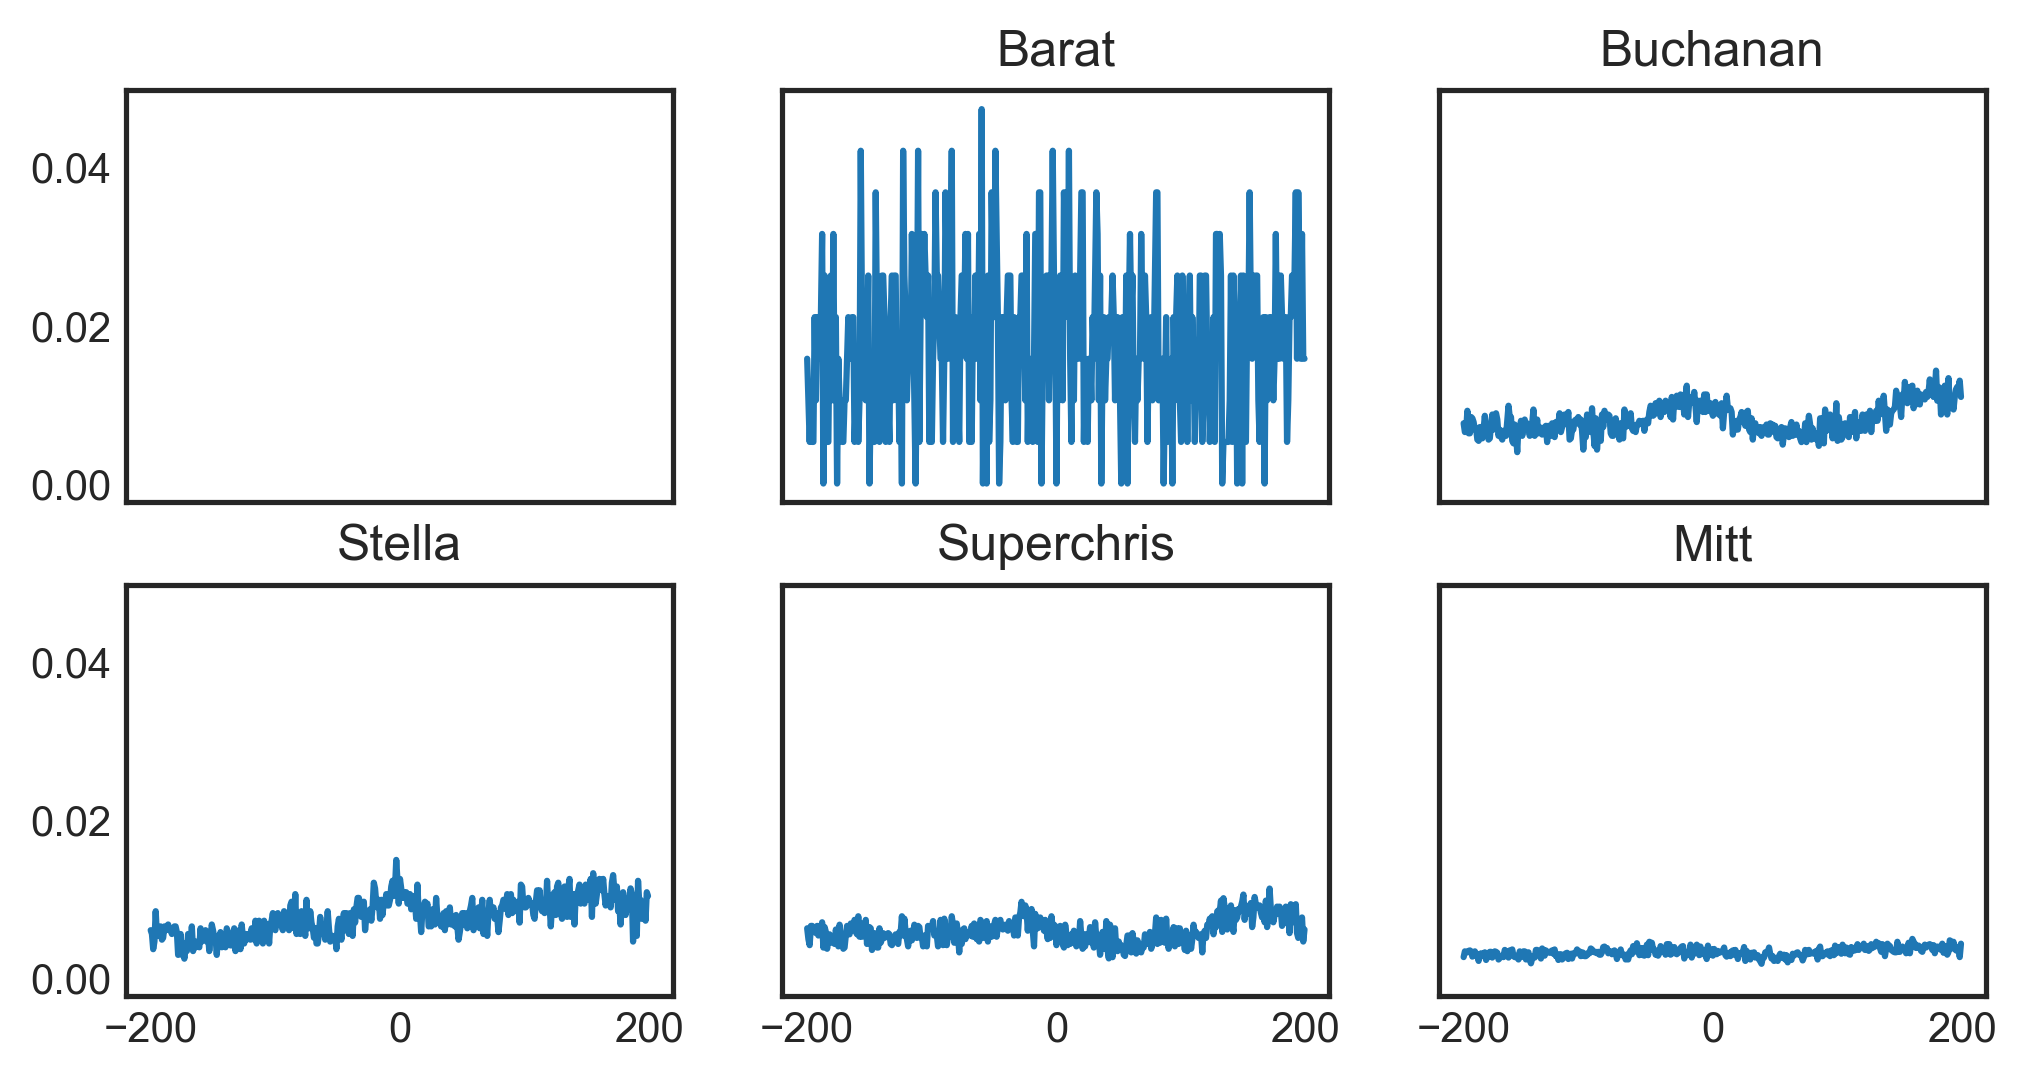

In [32]:


# Creates five subplots and unpacks the output array immediately
f, axes = plt.subplots(2, 3, sharey=True, figsize=(8, 4), dpi=300)
ensList = []
i,j = 0,1
for rat_name in spikeDict.keys():
    spike_data = spikeDict[rat_name] # Grab the spikes
    
    avgSpk = np.mean(spike_data, axis=0)  # compute the mean spike over trials
    ensembleFire = np.mean(avgSpk, axis=0) # Find the mean of all neurons per time for the trial
    ensList.append(ensembleFire)
    
    # Plot the avg trial avg fire
    axes[i,j].plot(tAx, ensembleFire)
    #axes[i].set_title('AVG trial AVG: %s'%(rat_name))
    axes[i,j].set_title(rat_name)
    if i != 1:
        axes[i,j].axes.get_xaxis().set_ticks([])
        axes[0,0].axes.get_xaxis().set_ticks([])
    
    if j < 2:
        j += 1
    else:
        j = 0
        i += 1
    
plt.savefig('figs\\allRatFireingAvgs'+'_seq-'+str(inseq)+'_corr-'+str(corr)+'.png')
#plt.show()

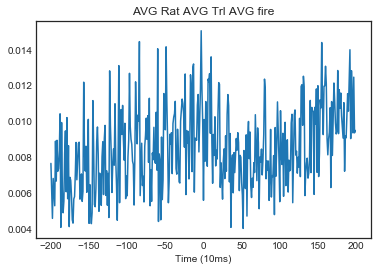

In [33]:
ens = np.stack(ensList, axis=0)
plt.plot(tAx,np.mean(ens, axis=0))
plt.title('AVG Rat AVG Trl AVG fire')
plt.xlabel('Time (10ms)')
plt.savefig('figs\\allRatMeanFireingAvg'+'_seq-'+str(inseq)+'_corr-'+str(corr)+'.png')


Text(0.5, 1.0, 'AVG trial AVG: Mitt | inseq = 1 | corr = 1')

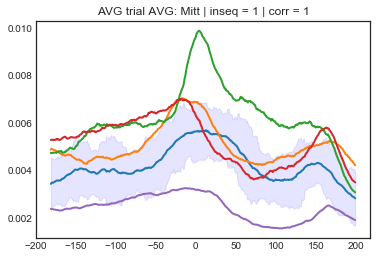

In [20]:
import pandas as pd
time_series_df = pd.DataFrame(ens.T)
smooth_path    = time_series_df.rolling(20).mean()
path_deviation = 2 * time_series_df.rolling(20).std()
plt.plot(tAx, smooth_path, linewidth=2)
plt.fill_between(tAx, (smooth_path-2*path_deviation)[0], (smooth_path+2*path_deviation)[0], color='b', alpha=.1)
plt.title('AVG trial AVG: %s | inseq = %s | corr = %s'%(rat_name, inseq, corr))

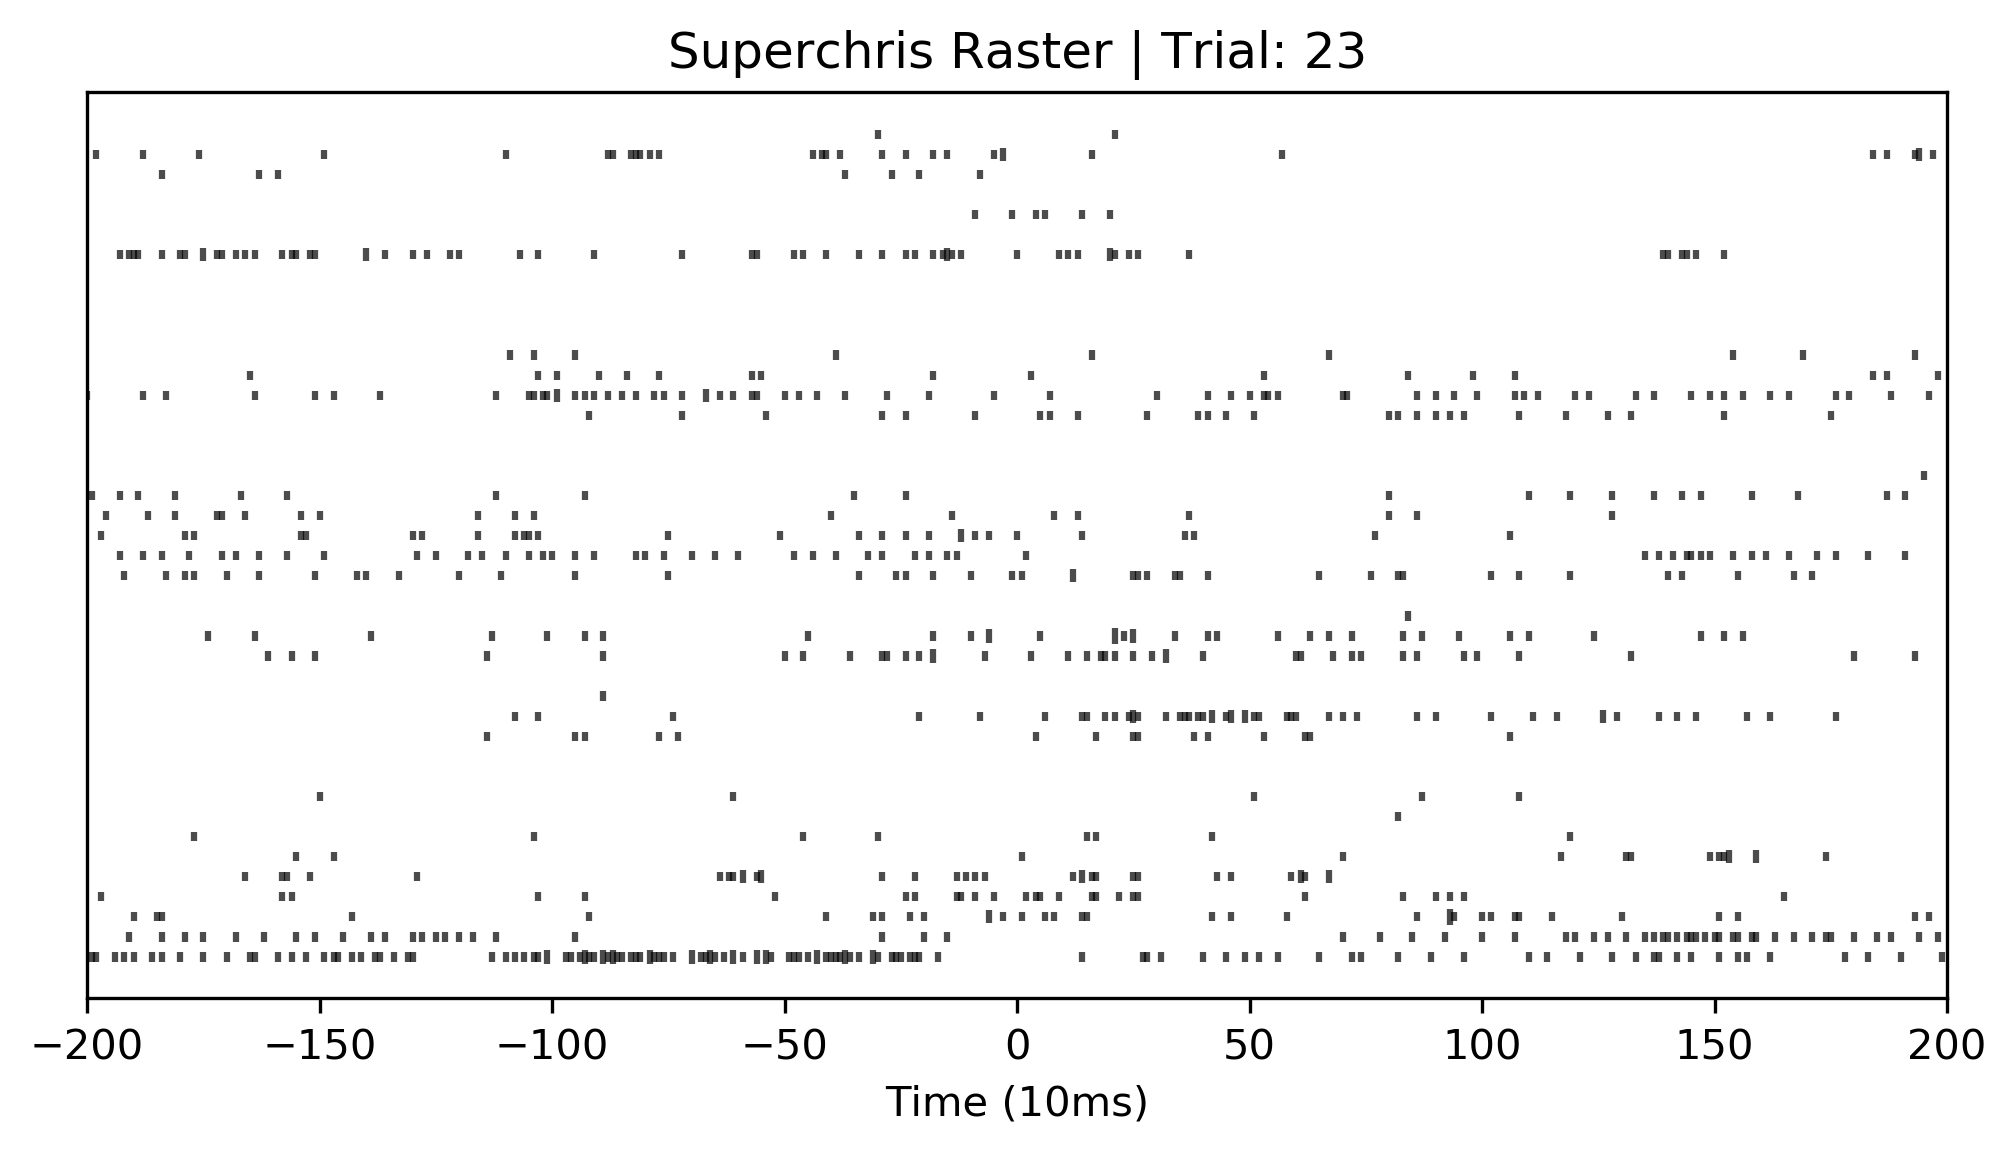

In [17]:
saveFig = 0
trial_index = 23
fig = plt.figure(figsize=(8, 4), dpi=300)
for i in range(spike_data.shape[1]):
    plt.scatter(np.arange(400) - 200, np.ones(400) * i, s=spike_data[trial_index, i, :] * 50, color='black', marker="|",alpha=0.7)
plt.xlim(-200, 200)
#plt.ylim(0.5, 46.5)
plt.xlabel('Time (10ms)')
plt.yticks([], [])
plt.title('%s Raster | Trial: %s'%(rat_name, trial_index))
if saveFig: 
    plt.savefig('figs\\'+rat_name+'_Raster_TI-'+str(trial_index)+'.png')
plt.show()

## Testing the theta decoding functions

In [50]:
theta_thres = 20
corr_thres = 0.9
rat_name = 'Superchris'

dataPaths = {}
dataPaths['trial'] = 'D:\Documents\Data\processedHPC\{}\{}_trial_info.npy'
dataPaths['spike'] = 'D:\Documents\Data\processedHPC\{}\{}_spike_data_binned.npy'
dataPaths['lfp'] = 'D:\Documents\Data\processedHPC\{}\{}_lfp_data_sampled.npy'

trial_info, spike_data, lfp_data = load_data(dataPaths, rat_name)
target, spike_data, lfp_data = clean_data(trial_info, spike_data, lfp_data)
tetrode_index = reference_tetrode(rat_name)
lfp_reference = lfp_data[:, tetrode_index, :]  # get reference LFP



In [54]:
training_features = process_spike(spike_data, lfp_reference)

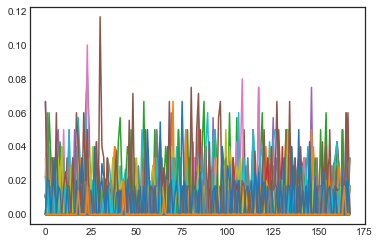

In [52]:
plt.plot(training_features)

In [7]:
# testing the analysis flow functions
theta_thres=20
corr_thres=0.9
trial_info, spike_data, lfp_data = load_data(dataPaths, rat_name)
target, spike_data, lfp_data = clean_data(trial_info, spike_data, lfp_data)
tetrode_index = reference_tetrode(rat_name)

lfp_reference = lfp_data[:, tetrode_index, :]  # get reference LFP
# (n: trials by d: cells )
training_features = process_spike(spike_data, lfp_reference)  # align spike train with LFP
# spike_data.shape -> (168, 42, 400)
# training_features.shape -> (168, 42) (trials, cells)


scaler = StandardScaler()
training = scaler.fit_transform(training_features)
amp_dist = amplitude_distribution(lfp_reference)
select_trial = amp_dist > np.percentile(amp_dist, theta_thres)  # select trials by amplitude
#linear_circular_corr = correlate_time_phase(spike_data, lfp_reference)
#select_cell = linear_circular_corr > corr_thres  # select cells by correlation

#training_select = training[select_trial][:, select_cell]
# training_select.shape -> (134, 42) (trials, cells)
# target_select.shape -> (134,)
training_select = training[select_trial]
target_select = target[select_trial]


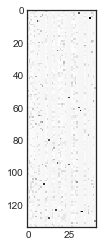

In [13]:
plt.imshow(training_select)

In [18]:
num_cells = training_select.shape[1]
num_cells

42

(134, 41)


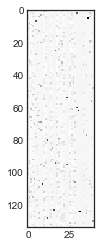

In [23]:
train_loo = np.delete(training_select, 2, axis=1)
print(train_loo.shape)
print()
plt.imshow(train_loo)

In [24]:
print(training_features.shape)
tf_loo = np.delete(training_features, 2, axis=1)
print(tf_loo.shape)

(168, 42)
(168, 41)


In [28]:
i = 1
current_features = process_spike(spike_data, lfp_reference, [360 + i * 120, 480 + i * 120])

# current_features.shape -> (168, 42)
cell_idx = 0 
cf_loo = np.delete(current_features, cell_idx, axis=1) # LOO
cf_loo.shape

(168, 41)

In [33]:
rolling_features = process_spike(spike_data, lfp_reference, [300 + i * 10, 420 + i * 10])
print(rolling_features.shape)
rf_loo = np.delete(rolling_features, cell_idx, axis=1) # LO
print(rf_loo.shape)

(168, 42)
(168, 41)


(42,)

In [34]:
target.shape

(168,)

0.0


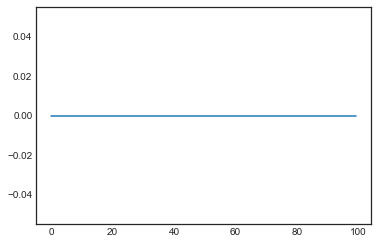

In [21]:
import time

start = time.time()
timeList = []
for II in range(0,1000):
    start2 = time.time()
    II + 1
    if II % 10 == 0:
        tme = time.time() - start2
        timeList.append(tme)
print(time.time() - start)

plt.plot(timeList)



## Other stuff:

## Data extraction
Data are extracted from Matlab files *from -2s to 2s relative to odor release* using functions in https://github.com/gaelias/statMatrixNeuralAnalysis

In [16]:
#data_odor = loadmat('/Users/linggeli/neuroscience/data/Mitt/mitt_extraction_odor2s.mat')

data_odor = loadmat('D:\Documents\Data\processedHPC\Mitt\mitt_extraction_odor2s.mat')
rat_name = 'Mitt'

In [7]:
print(data_odor.keys())  # data are stored as arrays in a dictionary with these names

dict_keys(['__header__', '__version__', '__globals__', 'eventTimeBins', 'lfpEpoch', 'lfpIDs', 'trialInfo', 'trialTimeBins', 'unitEpoch', 'unitIDs'])


In [8]:
print(data_odor['trialInfo'].shape)  # there are 292 trials
# for each trial we know the whether it is in-sequence or correct and its odor
#np.save('trial_info.npy', data_odor['trialInfo'])

(292, 4)


In [9]:
print(data_odor['unitEpoch'].shape)  
# there are 104 cell/neuron units and the spike train data are recorded at 4001 time points

(292, 4001, 104)


In [25]:
# some stats for the session:
_,_,num_cells = data_odor['unitEpoch'].shape
_,_,num_channels = data_odor['lfpEpoch'].shape
print('Cell Count: %s; Channel Count: %s'%(num_cells, num_channels))

Cell Count: 104; Channel Count: 21


In [10]:
print(data_odor['lfpEpoch'].shape)  
# similarly there are 21 LFP channels/tetrodes with data recorded at 4001 time points

(292, 4001, 21)


In [11]:
print(data_odor['eventTimeBins'])  # the time points are sampled every 1ms from -2s to 2s where 0s is odor release

[[-2.   ]
 [-1.999]
 [-1.998]
 ...
 [ 1.998]
 [ 1.999]
 [ 2.   ]]


In [12]:
print(data_odor['lfpIDs'])  # tetrode ids

[[array(['T12_LFP_Raw'], dtype='<U11')
  array(['T13_LFP_Raw'], dtype='<U11')
  array(['T14_LFP_Raw'], dtype='<U11')
  array(['T15_LFP_Raw'], dtype='<U11')
  array(['T16_LFP_Raw'], dtype='<U11')
  array(['T17_LFP_Raw'], dtype='<U11')
  array(['T18_LFP_Raw'], dtype='<U11')
  array(['T19_LFP_Raw'], dtype='<U11')
  array(['T1_LFP_Raw'], dtype='<U10')
  array(['T20_LFP_Raw'], dtype='<U11')
  array(['T21_LFP_Raw'], dtype='<U11')
  array(['T22_LFP_Raw'], dtype='<U11')
  array(['T23_LFP_Raw'], dtype='<U11')
  array(['T2_LFP_Raw'], dtype='<U10') array(['T3_LFP_Raw'], dtype='<U10')
  array(['T4_LFP_Raw'], dtype='<U10') array(['T5_LFP_Raw'], dtype='<U10')
  array(['T6_LFP_Raw'], dtype='<U10') array(['T7_LFP_Raw'], dtype='<U10')
  array(['T8_LFP_Raw'], dtype='<U10') array(['T9_LFP_Raw'], dtype='<U10')]]


In [70]:
print(data_odor['unitIDs'])  # mapping between tetrodes and units
#some tetrodes have no units while others have multiple

[[array([u'T12-U1'], dtype='<U6') array([u'T12-U2'], dtype='<U6')
  array([u'T12-U3'], dtype='<U6') array([u'T12-U4'], dtype='<U6')
  array([u'T12-U5'], dtype='<U6') array([u'T12-U6'], dtype='<U6')
  array([u'T12-U7'], dtype='<U6') array([u'T12-U8'], dtype='<U6')
  array([u'T12-U9'], dtype='<U6') array([u'T12-U10'], dtype='<U7')
  array([u'T12-U11'], dtype='<U7') array([u'T12-U12'], dtype='<U7')
  array([u'T12-U13'], dtype='<U7') array([u'T12-U14'], dtype='<U7')
  array([u'T12-U15'], dtype='<U7') array([u'T12-U16'], dtype='<U7')
  array([u'T13-U1'], dtype='<U6') array([u'T13-U2'], dtype='<U6')
  array([u'T13-U3'], dtype='<U6') array([u'T13-U4'], dtype='<U6')
  array([u'T13-U5'], dtype='<U6') array([u'T13-U6'], dtype='<U6')
  array([u'T13-U7'], dtype='<U6') array([u'T13-U8'], dtype='<U6')
  array([u'T13-U9'], dtype='<U6') array([u'T13-U10'], dtype='<U7')
  array([u'T13-U11'], dtype='<U7') array([u'T13-U12'], dtype='<U7')
  array([u'T13-U13'], dtype='<U7') array([u'T13-U14'], dtype='<U7'

In [13]:
spike_data = data_odor['unitEpoch'][:, 1:, :]  
# remove the first time point at -2s so that the time series length becomes 4000 for convenience
spike_data_temp = np.swapaxes(spike_data, 1, 2)
# reduce the temporal resolution to 10ms by averaging every 10 time points
spike_data_binned = np.mean(spike_data_temp.reshape((data_odor['unitEpoch'].shape[0], data_odor['unitEpoch'].shape[2], 400, 10)), axis=3)
print(spike_data_binned.shape)
#np.save('spike_data_binned.npy', spike_data_binned)

(292, 104, 400)


In [14]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Georgia'

## Spike train and LFP data 
The spike train data are sparse even after 10ms binning; many units do not have spikes and those that have spikes do so not very frequently. The LFP data on the other hand are very noisy.

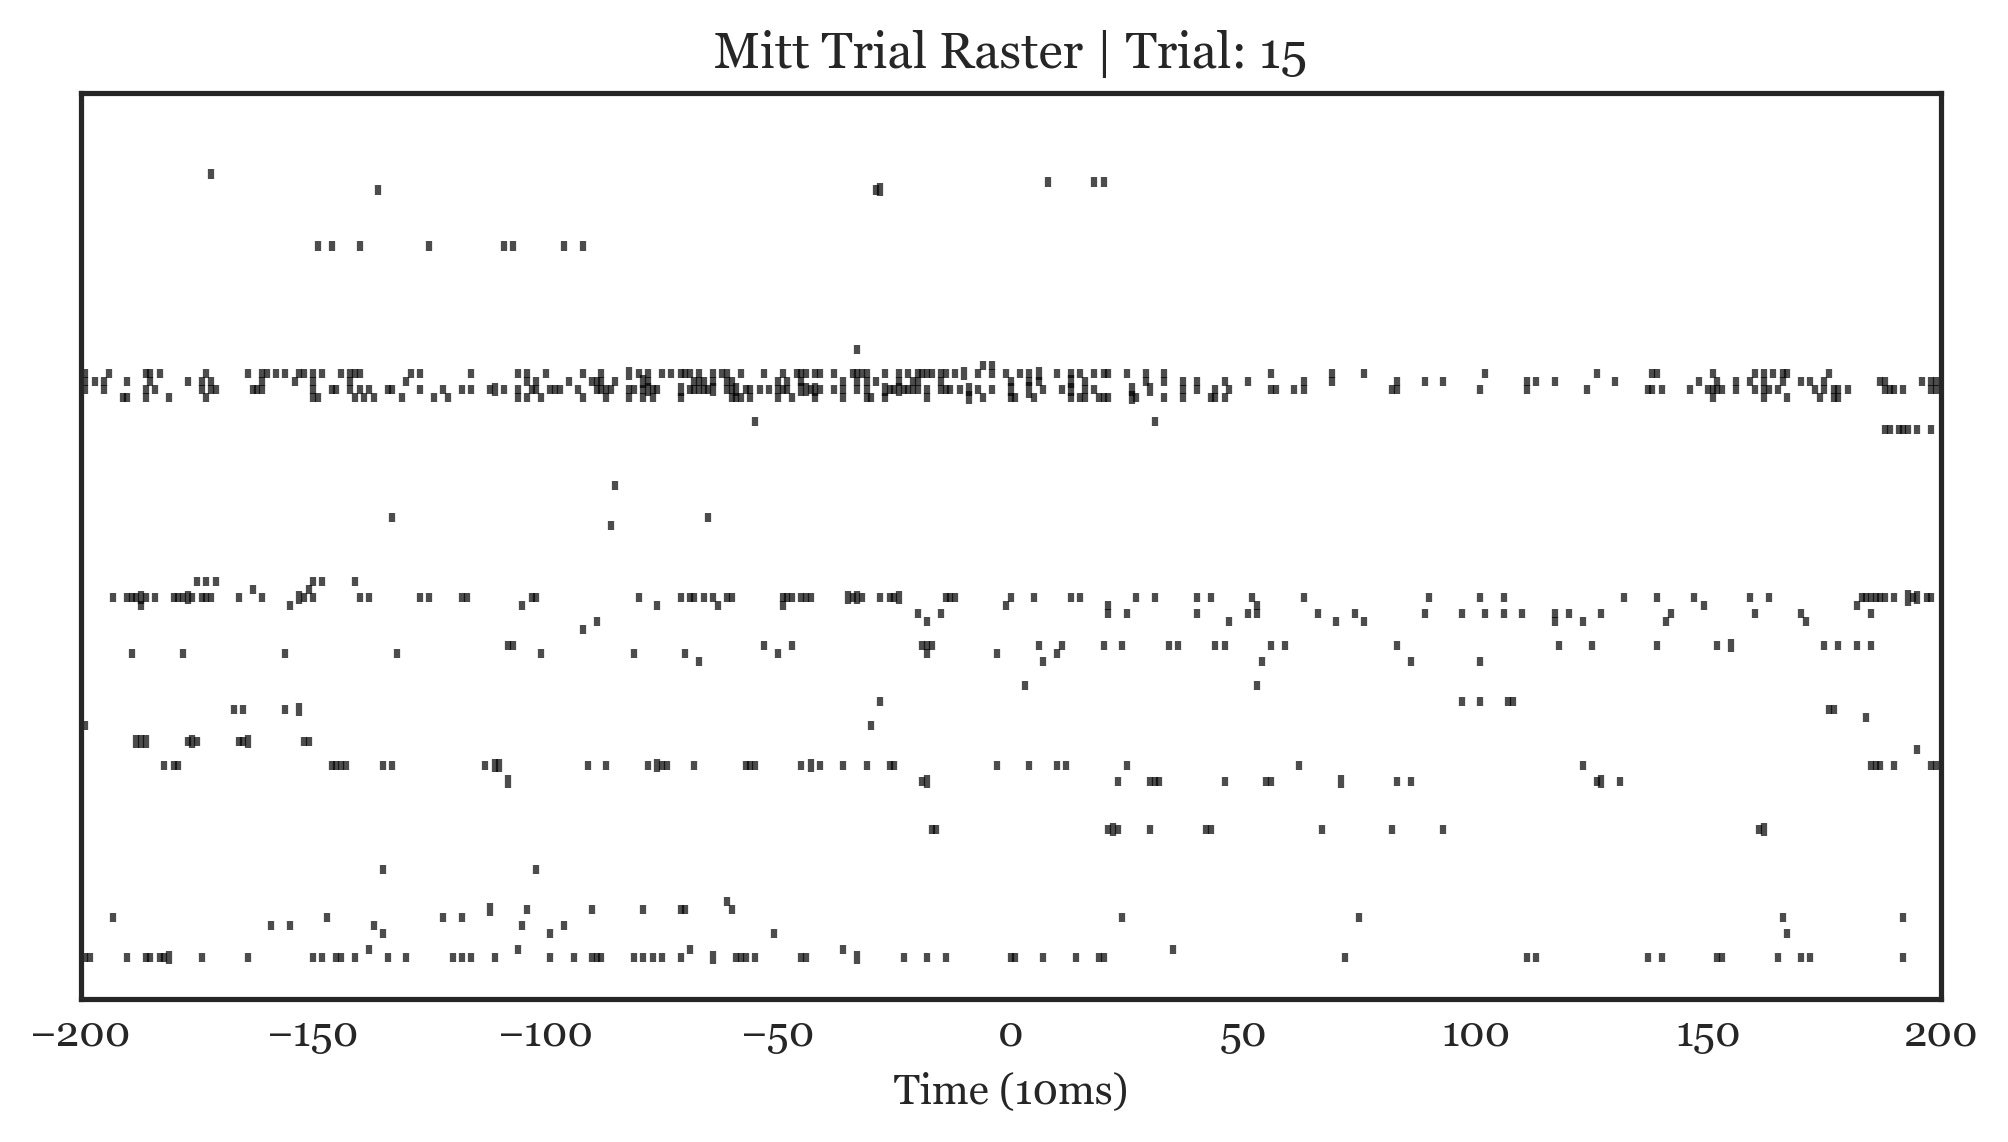

In [42]:
trial_index = 15
fig = plt.figure(figsize=(8, 4), dpi=300)
for i in range(spike_data_binned.shape[1]):
    plt.scatter(np.arange(400) - 200, np.ones(400) * i, s=spike_data_binned[trial_index, i, :] * 50, color='black', marker="|",alpha=0.7)
plt.xlim(-200, 200)
#plt.ylim(0.5, 46.5)
plt.xlabel('Time (10ms)')
plt.yticks([], [])
plt.title('%s Raster | Trial: %s'%(rat_name, trial_index))
plt.savefig('figs\Mitt_Raster_TI-'+str(trial_index)+'.png')
plt.show()

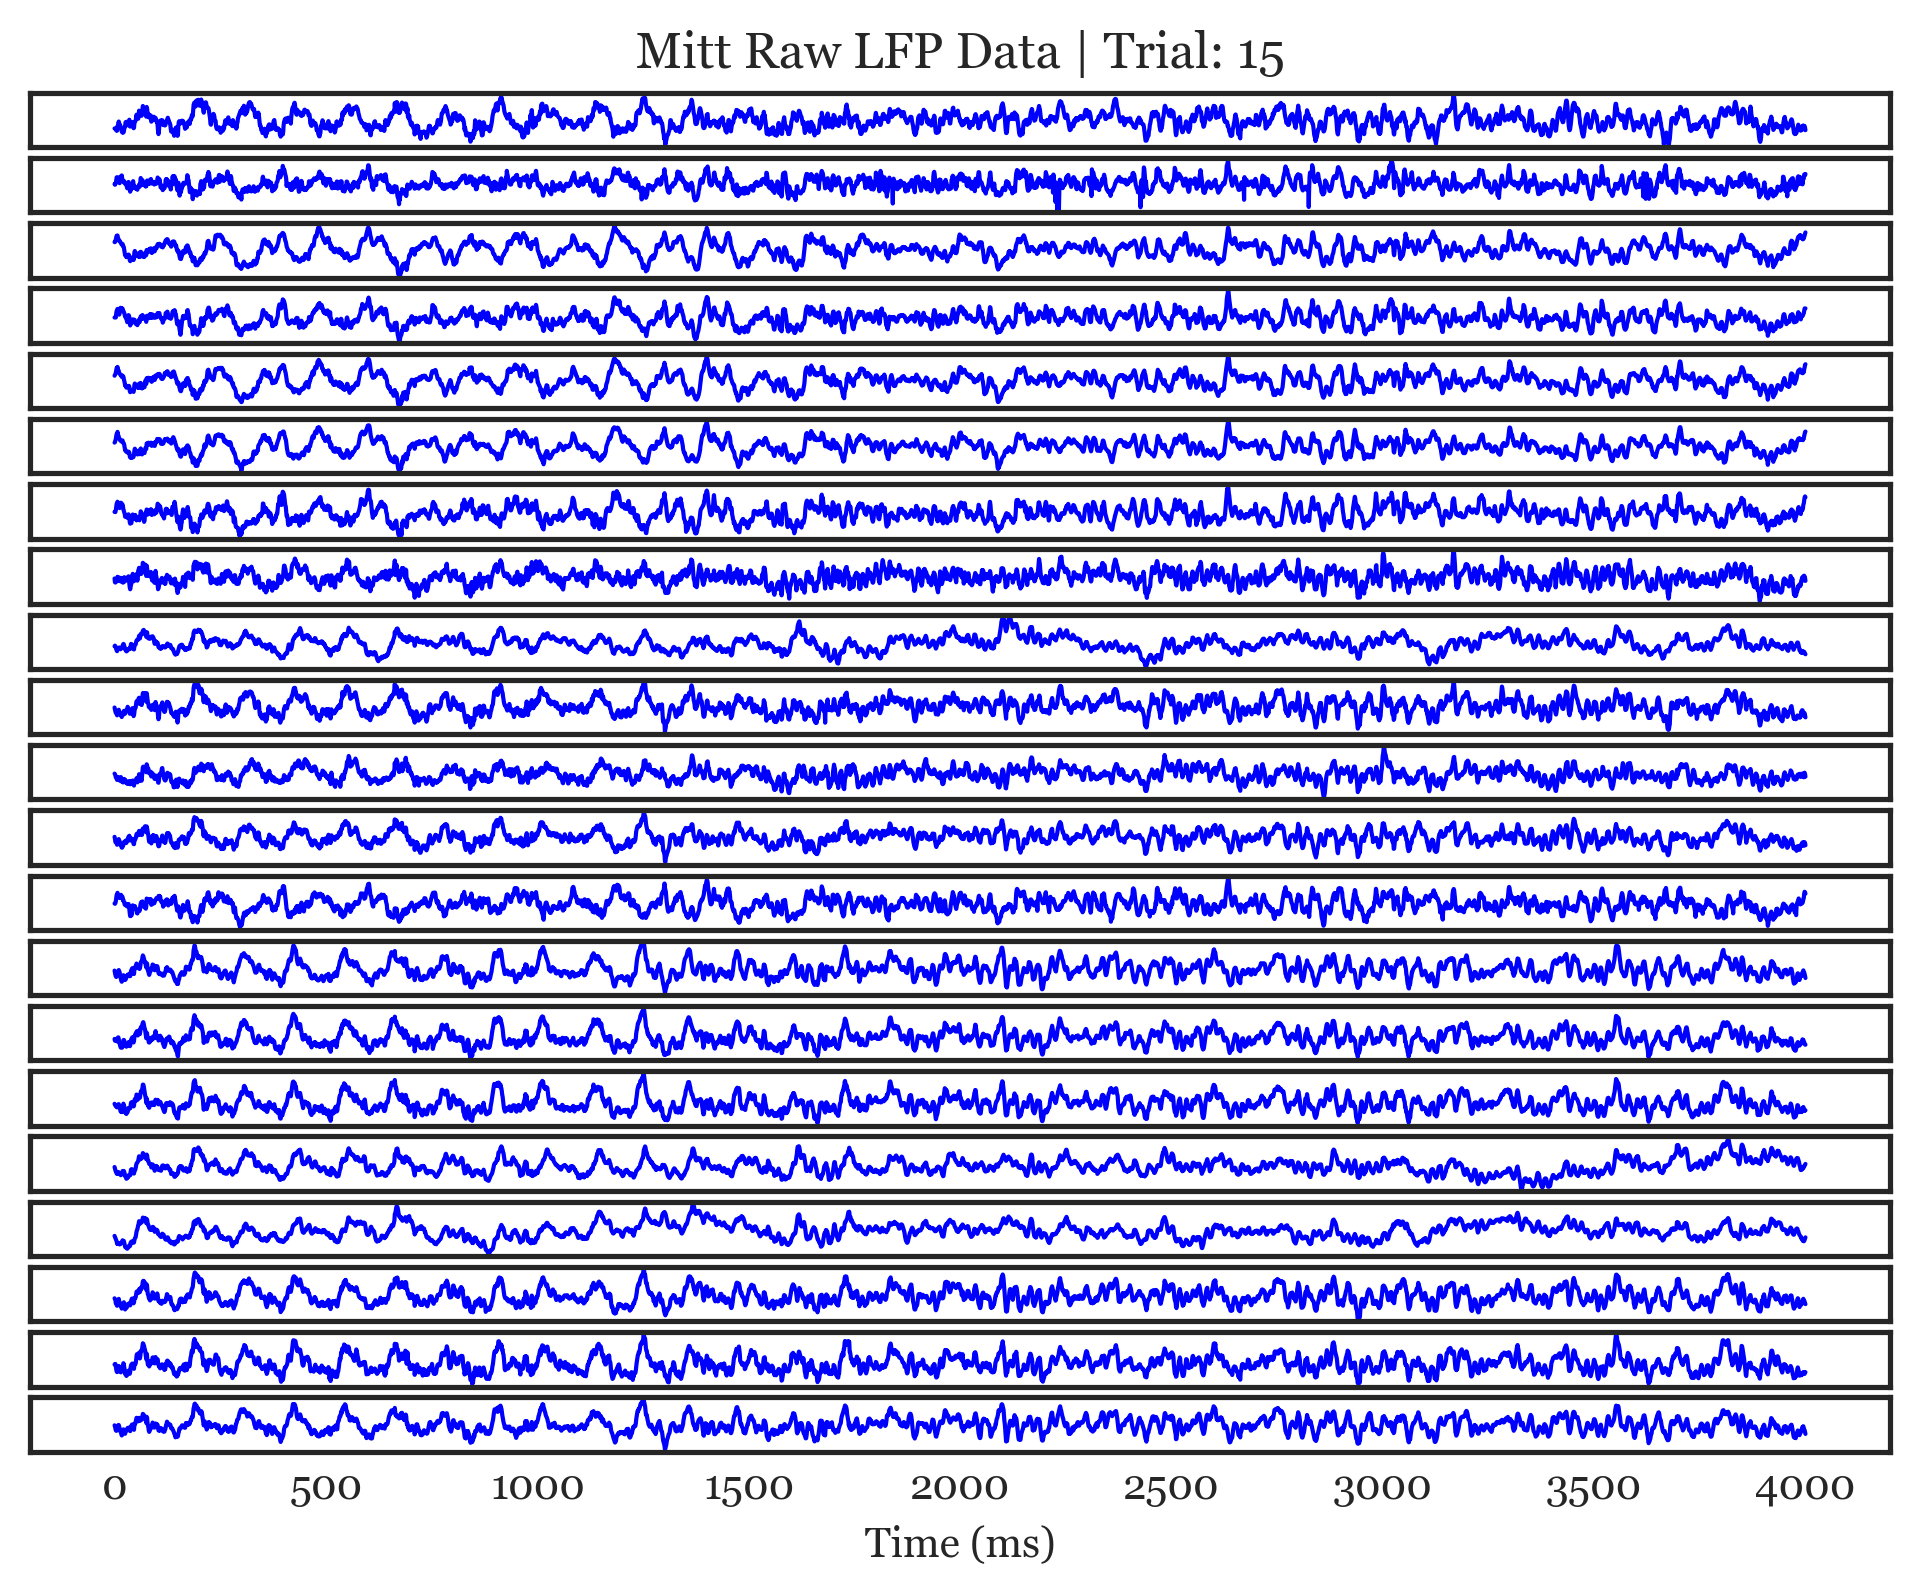

In [44]:
trial_index = 15
fig = plt.figure(figsize=(8, 6), dpi=300)
for l in range(data_odor['lfpEpoch'].shape[2]):
    plt.subplot(data_odor['lfpEpoch'].shape[2], 1, l + 1)
    plt.plot(data_odor['lfpEpoch'][trial_index][:, l], linewidth=1, c='blue')
    plt.yticks([], [])
    if l < data_odor['lfpEpoch'].shape[2] - 1:
        plt.xticks([], [])
    if l == 0:
        plt.title('%s Raw LFP Data | Trial: %s'%(rat_name, trial_index))
plt.xlabel('Time (ms)')
plt.show()

In [75]:
#np.save('lfp_data_sampled.npy', data_odor['lfpEpoch'][:, 1::10, :])

In [76]:
# get the actual clock time as opposed to time relative to odor release
n = data_odor['trialInfo'].shape[0]
actual_time = np.zeros((n, 400))
for i in range(n):
    actual_time[i, :] = data_odor['trialTimeBins'][0, :][i][1::10, 0]
#np.save('actual_time.npy', actual_time)